# Problem Sheet 6

## Halfspaces classifier and logistic regression

## Task (a) (Warm-up)
Consider $\mathbf{D} = \{(\mathbf{x}_1,y_1), (\mathbf{x}_2,y_2)\}$, where
$$
\mathbf{x}_1 = \begin{bmatrix}-1 \\ 1\end{bmatrix}, \qquad \mathbf{x}_2 = \begin{bmatrix}2 \\ -1\end{bmatrix},
$$
and $y_1=1$, $y_2=-1$.

- Find all halfspaces parameters $\boldsymbol\theta^* \in \mathbb{R}^2$ solving Eq. (4.4) in the typed notes.

## Solution

$$
L_{\mathbf{D}}(\boldsymbol\theta) = \frac{1}{2}(-\min(y_1\langle \boldsymbol\theta, \mathbf{x}_1 \rangle, 0) - \min(y_2\langle \boldsymbol\theta, \mathbf{x}_2 \rangle, 0)) = -\frac{1}{2} \min(\theta_2 - \theta_1,0) - \frac{1}{2}\min(\theta_2 - 2\theta_1, 0).
$$

As in PS5(b), resolve the constraint $\|\boldsymbol\theta\|_2=1$ by defining $\theta_2 = \pm \sqrt{1-\theta_1^2}$ and minimizing $L_{\mathbf{D}}$ over $\theta_1 \in [-1,1]$ only. However, since the $\min$ is not differentiable at $0$, we need to consider 4 cases separately:

- $\theta_1 \ge 0$

  - $\theta_2 \ge 0$: here, $\theta_2-\theta_1 \ge \theta_2 - 2\theta_1$, so setting $\theta_2^* - 2\theta_1^*=0$ gives $L_{\mathbf{D}}(\boldsymbol\theta^*)=0$. Plugging in $\theta_2$, we get $\sqrt{1-(\theta_1^*)^2} = 2 \theta_1^*$, hence $1 = 5 (\theta_1^*)^2$, $\theta_1^* = 1/\sqrt{5}$ and $\theta_2^* = 2/\sqrt{5}$.
  
  - $\theta_2 < 0$: here also $\theta_2-2\theta_1 \le \theta_2 - \theta_1$ but both of them are negative, so both $\min$ are nontrivial: $L_{\mathbf{D}}(\boldsymbol\theta) = -\frac{1}{2}(\theta_2 - \theta_1) - \frac{1}{2}(\theta_2 - 2\theta_1) = \frac{3}{2}\theta_1 - \theta_2 = \frac{3}{2}\theta_1 + \sqrt{1-\theta_1^2}$. However, this loss is always positive for $\theta_1 \in [0,1]$, so whatever the minimal value, it can be rejected in favour of the previous case at least.
  
- $\theta_1 < 0$

  - $\theta_2 \ge 0$: now $\theta_2 - 2\theta_1 > \theta_2 - \theta_1 > 0$, so $L_{\mathbf{D}} = 0$, but $\boldsymbol\theta^*$ is not uniquely defined. Any vector $(\theta_1^*, \sqrt{1-(\theta_1^*)^2})$ where $\theta_1^* \in [-1,0)$ is a solution.
  
  - $\theta_2 < 0$: as in the previous case, $\theta_2 - 2\theta_1 > \theta_2 - \theta_1$, but now it is possible that $\theta_2 - \theta_1 \le 0$, so the optimal situation is $\theta_2 - \theta_1 = 0$ with $L_{\mathbf{D}} = 0$. Plugging in $\theta_2$, we obtain $-\sqrt{1-(\theta_1^*)^2} = \theta_1^*$, hence $\theta_1^* = -\frac{1}{\sqrt{2}} = \theta_2^*$.

## Task (b)
Consider the same dataset as in Task (a).

- Find the Support Vector Machine parameter $\boldsymbol\theta^* \in \mathbb{R}^2$ solving Eq. (4.5) in the typed notes.
- Explain why it should be preferred to $\boldsymbol\theta^*$ from Task (a) for reliable prediction on new data.

_Hint: similarly to Task (a), consider two cases_ $\theta_1 \ge 0$ _and_ $\theta_1<0$ _separately. However, now $\theta_2$ should depend uniquely on_ $\theta_1$ _in each case._

## Solution
The significantly correct classification constraints read
$$
y_1\langle \boldsymbol\theta, \mathbf{x}_1 \rangle = \theta_2 - \theta_1 \ge 1, \qquad y_2\langle \boldsymbol\theta, \mathbf{x}_2 \rangle = -(2 \theta_1 - \theta_2) = \theta_2 - 2\theta_1 \ge 1.
$$
Note that as long as one constraint is satisfied, the other one holds automatically.

- If $\theta_1\ge 0$, we need to satisfy only $\theta_2 - 2\theta_1 \ge 1$, which we can write as  $\theta_2 - 2\theta_1 = 1 + \mu$ for some $\mu\ge 0$. Now the norm squared reads
$$
\|\boldsymbol\theta\|_2^2 = \theta_1^2 + (2\theta_1+1+\mu)^2.
$$
However, since both $\theta_1 \ge 0$ and $\mu \ge 0$, $\|\boldsymbol\theta\|_2^2$ is minimal at $\mu=0$. For the rest of the expression,
$$
\|\boldsymbol\theta\|_2^2 = 5 \theta_1^2 + 4\theta_1 + 1 \quad \Rightarrow \quad \frac{d\|\boldsymbol\theta\|_2^2}{d\theta_1} = 10 \theta_1 + 4,
$$
and taking the gradient to 0 gives $\theta_1^* = -2/5$, which is not feasible under our assumption $\theta_1\ge 0$. So the minimal $\|\boldsymbol\theta^*\|_2^2 = 1$ in this case, with $\theta_1^*=0$ hence $\theta_2^*=1$.

- If $\theta_1<0$, we need to satisfy $\theta_2 - \theta_1 = 1+\mu$, hence
$$
\|\boldsymbol\theta\|_2^2 = \theta_1^2 + (\theta_1+1+\mu)^2 = 2 \theta_1^2 + 2\theta_1(1+\mu) + (1+\mu)^2 \quad \Rightarrow \quad \frac{d\|\boldsymbol\theta\|_2^2}{d\theta_1} = 4 \theta_1 + 2(1+\mu) = 0,
$$
and $\theta_1^* = -(1+\mu)/2$ which is feasible. In this case, 
$$
\|\boldsymbol\theta^*\|_2^2 = \frac{2(1+\mu)^2}{4} - \frac{2}{2}(1+\mu)^2 + (1+\mu)^2 = \frac{(1+\mu)^2}{2},
$$
which is minimized also at $\mu=0$ to the value $\|\boldsymbol\theta^*\|_2^2 = 1/2$ which is smaller than $\|\boldsymbol\theta^*\|_2^2 = 1$ for $\theta_1\ge 0$. Finally, $\theta_2^* = 1/2$, so $\boldsymbol\theta^* = (-1/2, 1/2)$.

The corresponding hyperplane (line) orthogonal to $\boldsymbol\theta^*$ reads $x_2=x_1$, which separates the data symmetrically with the largest margin, likely to classify new data on the two sides of $x_2=x_1$ correctly.


## Task (c)
Consider a dataset $\mathbf{D} = \{(\mathbf{x}_1,y_1), \ldots, (\mathbf{x}_m,y_m)\}$ with $\mathbf{x}_i \in \mathbb{R}^n$, $y_i \in \{-1,1\}$, $i=1,\ldots,m$.
- Find the gradient of the minus-log-likelihood of the logistic regression of this dataset.

## Solution

$$
\nabla L_{\mathbf{D}}(\boldsymbol\theta) = \nabla \sum_{i=1}^m \log(1+\exp(-y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle)) = \sum_{i=1}^m \frac{1}{1+\exp(-y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle)} \exp(-y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle) (-y_i) \nabla \langle \boldsymbol\theta, \mathbf{x}_i \rangle.
$$
The $j$-th partial derivative of the inner product reads
$$
\frac{\partial \langle \boldsymbol\theta, \mathbf{x}_i \rangle}{\partial \theta_j} = \frac{\partial }{\partial \theta_j} \sum_{k=1}^n \theta_k x_{i,k} = x_{i,j}, \quad j=1,\ldots,n,
$$
so $\nabla \langle \boldsymbol\theta, \mathbf{x}_i \rangle = \mathbf{x}_i$.
Dividing the nominator and denominator by $\exp(-y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle)$, we get 
$$
\nabla L_{\mathbf{D}}(\boldsymbol\theta) = \sum_{i=1}^m \frac{-y_i \mathbf{x}_i}{1 + \exp(y_i \langle \boldsymbol\theta, \mathbf{x}_i \rangle)}.
$$

---

## Task 1: logistic regression

Consider a larger version of the dataset from Task (a):

In [1]:
import numpy as np
X = np.vstack([np.linspace(-3,3,9).reshape(-1,1) + np.array([0, 1]),
               np.linspace(-3,3,9).reshape(-1,1) + np.array([0,-1])])
y = np.hstack((np.ones(9), -np.ones(9)))

- Write a Python function `L(theta,X,y)` that takes as input a parameter vector `theta`=$\boldsymbol\theta\in\mathbb{R}^n$, a matrix `X`$\in\mathbb{R}^{m \times n}$ of row vectors $\mathbf{x}_1,\ldots,\mathbf{x}_m \in \mathbb{R}^n$ stacked vertically, and a vector of labels `y`=$(y_1,\ldots,y_m)$, and returns the minus-log-likelihood $L_{\mathbf{D}}(\boldsymbol\theta)$ of the logistic regression of the dataset $\mathbf{D}$=(`X`,`y`) at the parameter `theta`.
- Write a Python function `gL(theta,X,y)` that takes the same inputs as `L(theta,X,y)`, and returns the gradient vector $\nabla L_{\mathbf{D}}(\boldsymbol\theta)$ derived in Task (c).

In [2]:
# Logistic regression minus-log-likelihood and its gradient
def L(theta, X,y):
    return np.sum(np.log(1+np.exp(-y*(X@theta))))

def gL(theta, X,y):
    return np.sum(-y.reshape(-1,1) * X / np.reshape(1+np.exp(y*(X@theta)), (-1,1)), axis=0)

## Task 2

- Read about [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function.
- Write a Python code using this function to minimize $L_{\mathbf{D}}$ from Task 1, starting from a zero initial guess.
- Write a Python code to plot $\mathbf{x}_1,\ldots,\mathbf{x}_m$ from Task 1 as points in $\mathbb{R}^2$, and the separating line corresponding to $\boldsymbol\theta^*$ produced by scipy.optimize.minimize on the same plot. You may want to restrict `xlim` and `ylim` of the plot to $[-4,4]$ for convenient picture.
- How accurate is the separating line visually, and how small is $\|\nabla L_{\mathbf{D}}(\boldsymbol\theta^*)\|_2$?

_Hint: the separating line equation reads_ $\langle \boldsymbol\theta^*, \mathbf{x}\rangle = 0$, _so the points on the line can be calculated as_ $\mathbf{x} = t \left[\theta_2^*, -\theta_1^*\right]$ _for_ $t\in\mathbb{R}$, _which you can restrict to_ $t \in [-1,1]$ _for plotting._

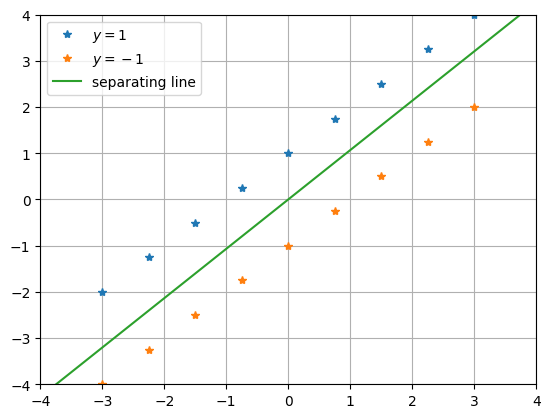

gL(theta_star) = 8.550364874472441e-06
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.981172226648795e-06
        x: [-1.927e+01  1.804e+01]
      nit: 23
      jac: [-4.974e-06 -6.955e-06]
 hess_inv: [[ 3.673e+05 -3.343e+05]
            [-3.343e+05  3.042e+05]]
     nfev: 25
     njev: 25


In [3]:
from matplotlib import pyplot as plt
from scipy.optimize import minimize

sol = minimize(lambda theta: L(theta,X,y), np.zeros(2), jac=lambda theta: gL(theta,X,y))
theta_star = sol.x

plt.plot(X[y==1,0], X[y==1,1], '*')
plt.plot(X[y==-1,0], X[y==-1,1], '*')
plt.plot(np.array([-1,1])*theta_star[1], -np.array([-1,1])*theta_star[0])
plt.legend(['$y=1$', '$y=-1$', 'separating line'])
plt.grid()
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

print(f"gL(theta_star) = {np.linalg.norm(gL(theta_star,X,y))}")
print(sol)  # Not needed but may be useful for further diagnostics

## Task 3
- Copy over the Gradient Descent function `gd` from the `GD.ipynb` demonstration notebook here.
- Repeat computations of Task 2 but replacing `scipy.optimize.minimize` with `gd` to find $\boldsymbol\theta^*$.
- What happens? How accurate is the separating line visually, and how small is $\|\nabla L_{\mathbf{D}}(\boldsymbol\theta^*)\|_2$?

converged in 5 iterations


C:\Users\Student\AppData\Local\Temp\ipykernel_14664\3609862858.py:3: RuntimeWarning: overflow encountered in exp
  return np.sum(np.log(1+np.exp(-y*(X@theta))))
c:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_optimize.py:2289: RuntimeWarning: invalid value encountered in scalar multiply
  q = (xf - fulc) * (fx - fnfc)
c:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_optimize.py:2288: RuntimeWarning: invalid value encountered in scalar subtract
  r = (xf - nfc) * (fx - ffulc)
c:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_optimize.py:2289: RuntimeWarning: invalid value encountered in scalar subtract
  q = (xf - fulc) * (fx - fnfc)
C:\Users\Student\AppData\Local\Temp\ipykernel_14664\3609862858.py:6: RuntimeWarning: overflow encountered in exp
  return np.sum(-y.reshape(-1,1) * X / np.reshape(1+np.exp(y*(X@theta)), (-1,1)), axis=0)


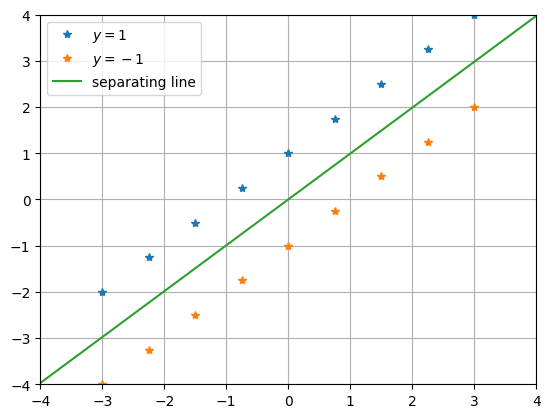

gL(theta_star) = 0.0


In [4]:
from scipy.optimize import fminbound

def gd(L, gL, theta0, eps=1e-6, max_iters=100):
    theta = theta0
    Thetas = []
    for k in range(max_iters):
        gLk = gL(theta)
        if (np.linalg.norm(gLk) < eps):
            print(f"converged in {k} iterations")
            break
        tk = fminbound(lambda t: L(theta - t * gLk), 0, 100)
        theta = theta - tk * gLk
        Thetas.append(theta)
    return theta, np.array(Thetas)

theta_star, _ = gd(lambda theta: L(theta,X,y), lambda theta: gL(theta,X,y), np.zeros(2))

plt.plot(X[y==1,0], X[y==1,1], '*')
plt.plot(X[y==-1,0], X[y==-1,1], '*')
plt.plot(np.array([-1,1])*theta_star[1], -np.array([-1,1])*theta_star[0])
plt.legend(['$y=1$', '$y=-1$', 'separating line'])
plt.grid()
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

print(f"gL(theta_star) = {np.linalg.norm(gL(theta_star,X,y))}")